In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm



In [2]:

class Euler():
    def __init__(self, r_0, v_0, h, steps, threed=False):
        self.s_0 = np.array(r_0 / norm(r_0))
        self.w_0 = np.array(v_0 / np.sqrt(1 / norm(r_0)))
        self.h = h
        self.location = [self.s_0]
        self.velocity = [self.w_0]
        self.energies = [1 / 4 * norm(self.w_0) ** 2 - 1 / norm(self.s_0)]
        self.steps = steps
        self.y_location = []
        self.x_location = []
        self.z_location = []
        self.threed = threed
        self.rel_Error = []

    def loc(self, i):
        location_i = self.location[i - 1] + (self.velocity[i - 1] * self.h)
        self.location.append(location_i)
        
    def vel(self, i):
        velocity_i =  self.velocity[i - 1] - ((self.location[i - 1] / norm(self.location[i - 1]) ** 3) * self.h)
        self.velocity.append(velocity_i)

    def energy(self, i):
        e =  1 / 4 * norm(self.velocity[i]) ** 2 - 1 / norm(self.location[i])
        self.energies.append(e)

    def split(self):
        if self.threed == False:
            for location in self.location:
                self.x_location.append(location[0])
                self.y_location.append(location[1])
        else:
            for location in self.location:
                self.x_location.append(location[0])
                self.y_location.append(location[1])
                self.z_location.append(location[2])

    def calc_rel_Error(self, i):
        rel_E_i = np.abs((self.energies[0] - self.energies[i])/self.energies[0])
        self.rel_Error.append(rel_E_i)
            
    def calc(self):
        for i in range(1, self.steps):
            loc = self.loc(i)
            self.vel(i)
            self.energy(i)
            self.calc_rel_Error(i)
            
        self.split()






<IPython.core.display.Javascript object>


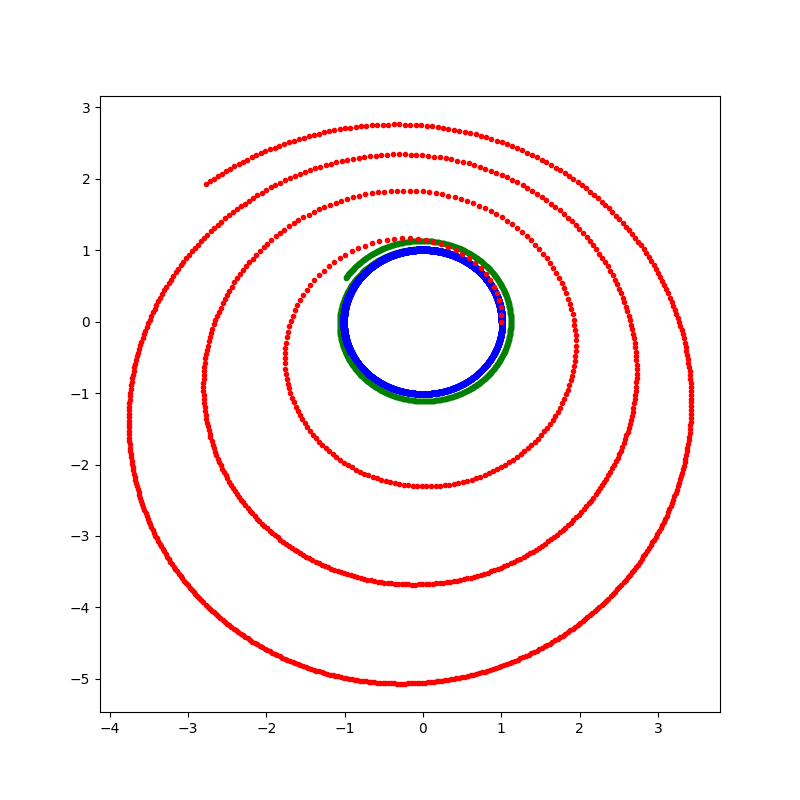

<IPython.core.display.Javascript object>


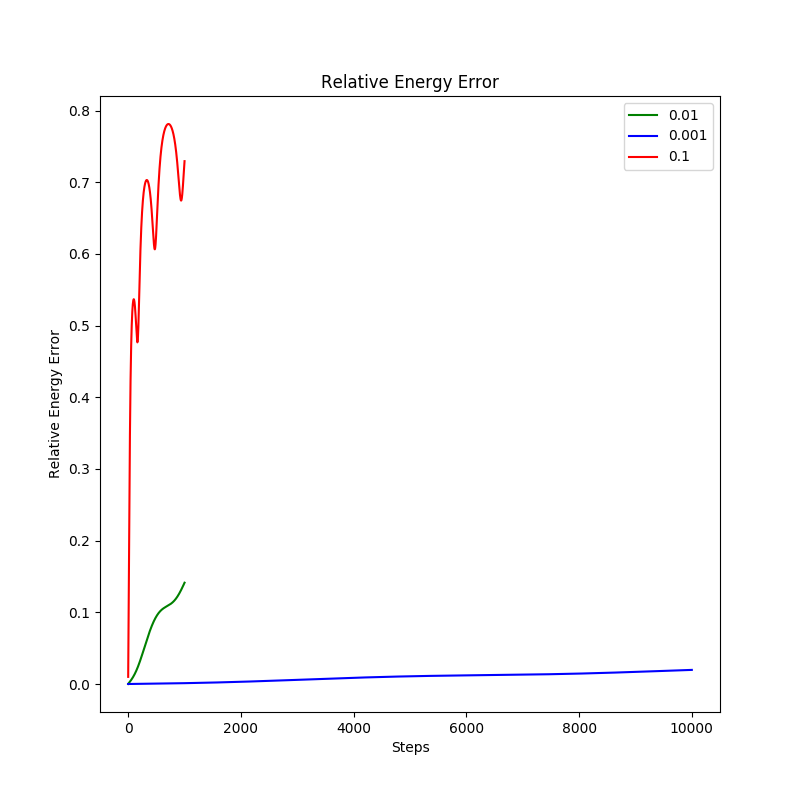

In [38]:
plt.figure(figsize=(8,8))


A = Euler([1, 0], [0,1], 0.01, 1000, threed=False)
A.calc()
plt.scatter(A.x_location, A.y_location, c="green", cmap='RdYlGn_r', marker=".")

B = Euler([1, 0], [0,1], 0.001, 10000, threed=False)
B.calc()
plt.scatter(B.x_location, B.y_location, c="blue", cmap='RdYlGn_r', marker=".")

C = Euler([1, 0], [0,1], 0.1, 1000, threed=False)
C.calc()
plt.scatter(C.x_location, C.y_location, c="red", cmap='RdYlGn_r', marker=".")


plt.figure(figsize=(8,8))
plt.title("Relative Energy Error")
plt.ylabel("Relative Energy Error")
plt.xlabel("Steps")
plt.plot(np.linspace(0, A.steps, len(A.rel_Error)), A.rel_Error, label=f"{str(A.h)}", c="green")
plt.plot(np.linspace(0, B.steps, len(B.rel_Error)), B.rel_Error, label=f"{str(B.h)}", c="blue")
plt.plot(np.linspace(0, C.steps, len(C.rel_Error)), C.rel_Error, label=f"{str(C.h)}", c="red")
plt.legend()

<IPython.core.display.Javascript object>


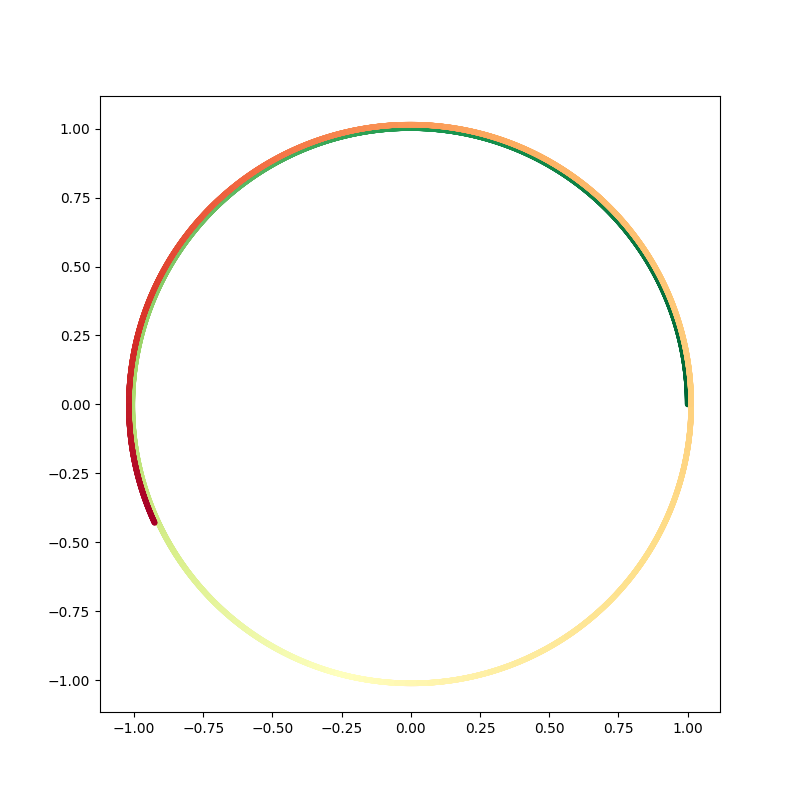

<IPython.core.display.Javascript object>


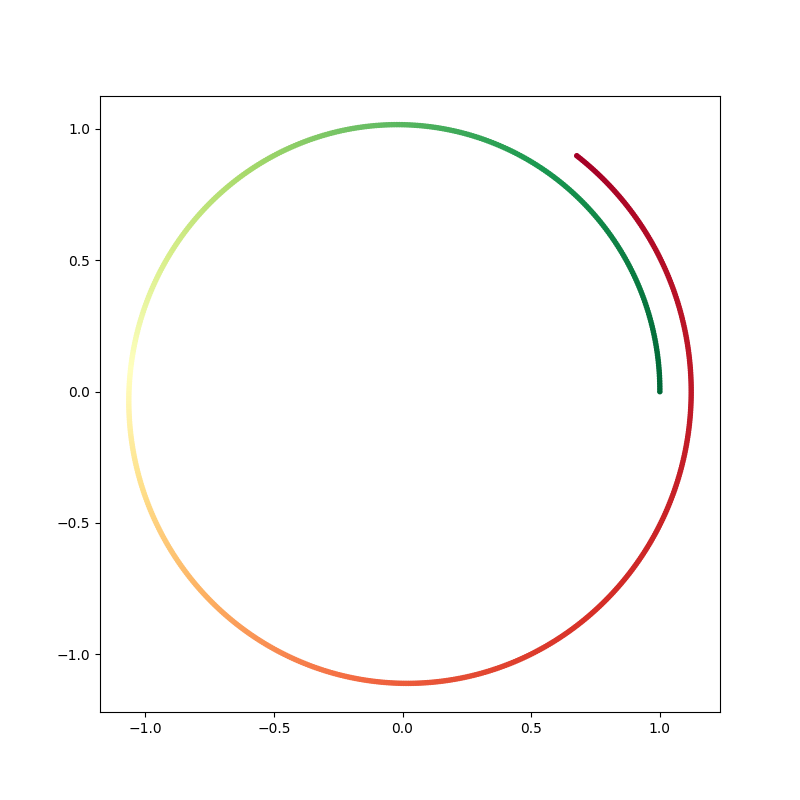

<IPython.core.display.Javascript object>


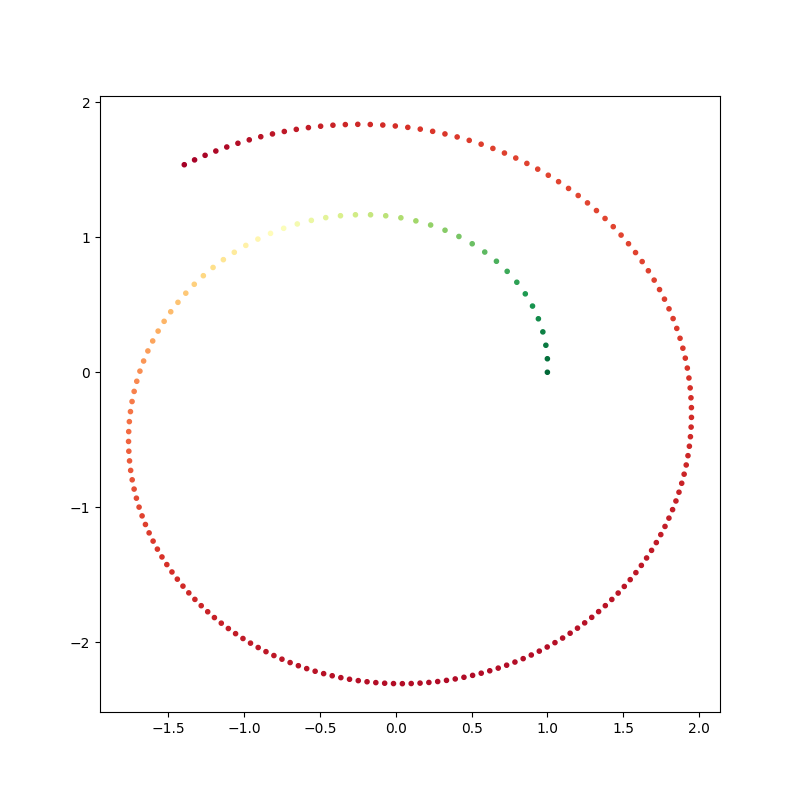

<IPython.core.display.Javascript object>


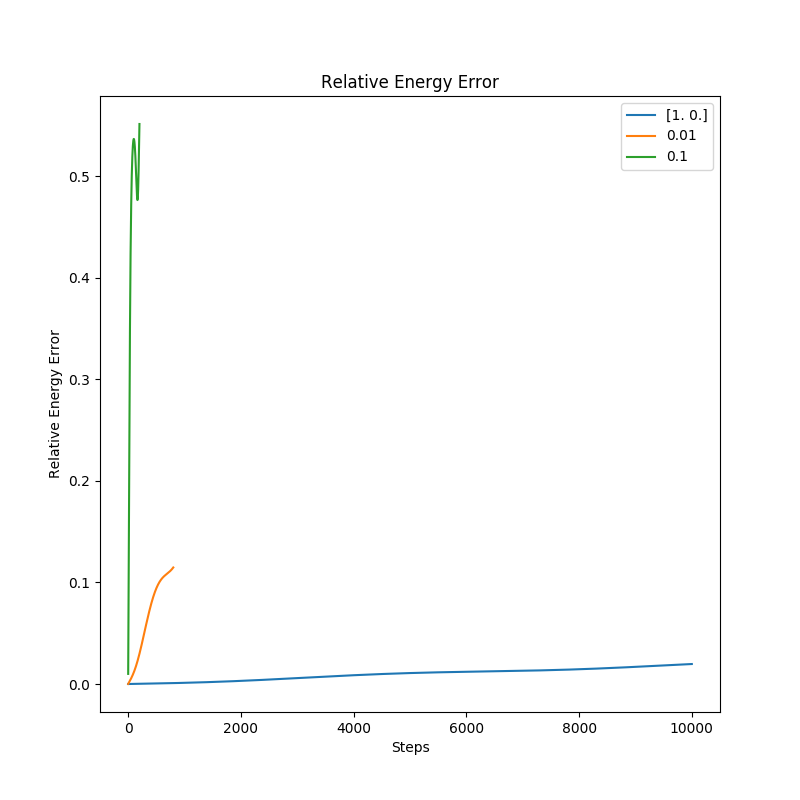

In [37]:
plt.figure(figsize=(8,8))


A = Euler([1, 0], [0,1], 0.001, 10000, threed=False)
A.calc()
plt.scatter(A.x_location, A.y_location, c=A.energies, cmap='RdYlGn_r', marker=".")


plt.figure(figsize=(8,8))


B = Euler([1, 0], [0,1], 0.01, 800, threed=False)
B.calc()
plt.scatter(B.x_location, B.y_location, c=B.energies, cmap='RdYlGn_r', marker=".")


plt.figure(figsize=(8,8))


C = Euler([1, 0], [0,1], 0.1, 200, threed=False)
C.calc()
plt.scatter(C.x_location, C.y_location, c=C.energies, cmap='RdYlGn_r', marker=".")


plt.figure(figsize=(8,8))
plt.title("Relative Energy Error")
plt.ylabel("Relative Energy Error")
plt.xlabel("Steps")
plt.plot(np.linspace(0, A.steps, len(A.rel_Error)), A.rel_Error, label=A.s_0)
plt.plot(np.linspace(0, B.steps, len(B.rel_Error)), B.rel_Error, label=f"{str(B.h)}")
plt.plot(np.linspace(0, C.steps, len(C.rel_Error)), C.rel_Error, label=f"{str(C.h)}")
plt.legend()

<IPython.core.display.Javascript object>


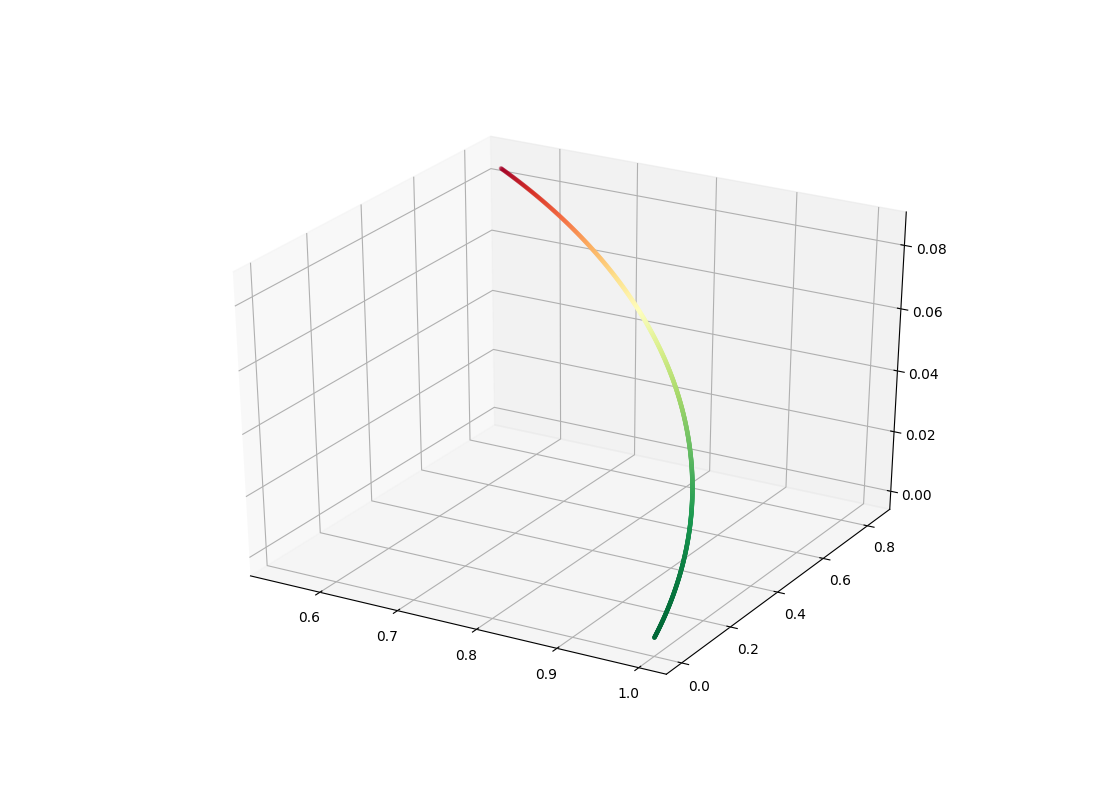

<IPython.core.display.Javascript object>


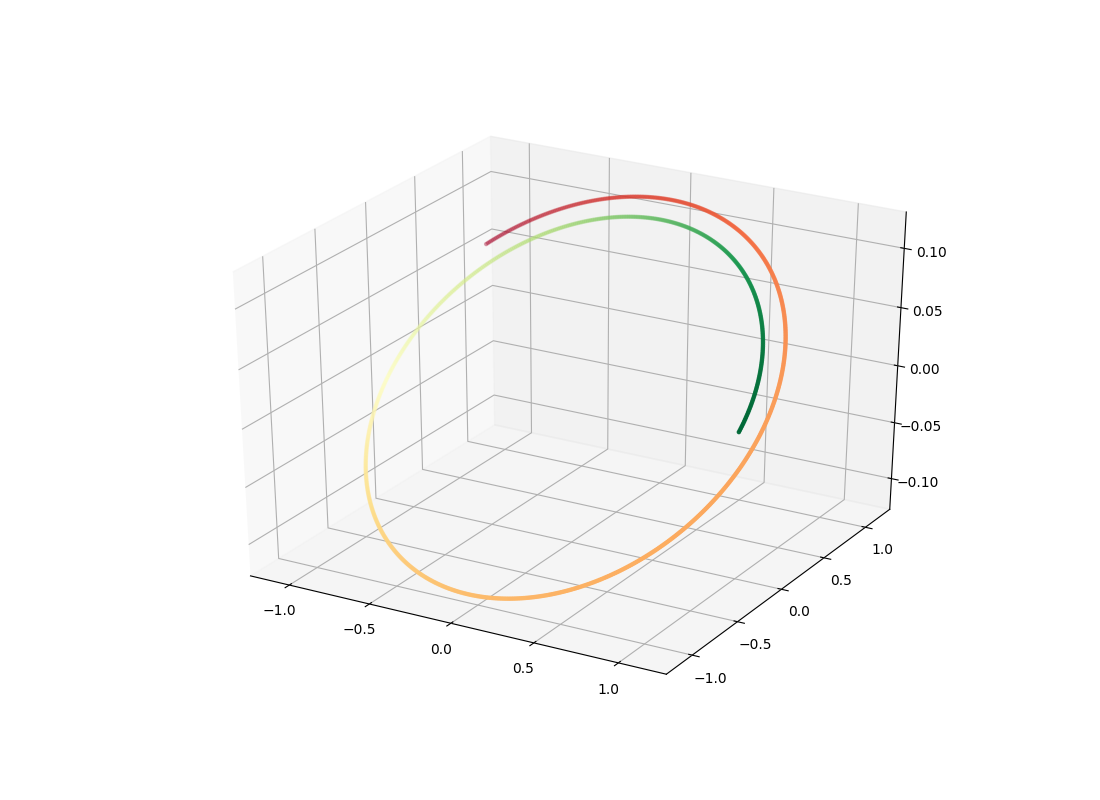

<IPython.core.display.Javascript object>


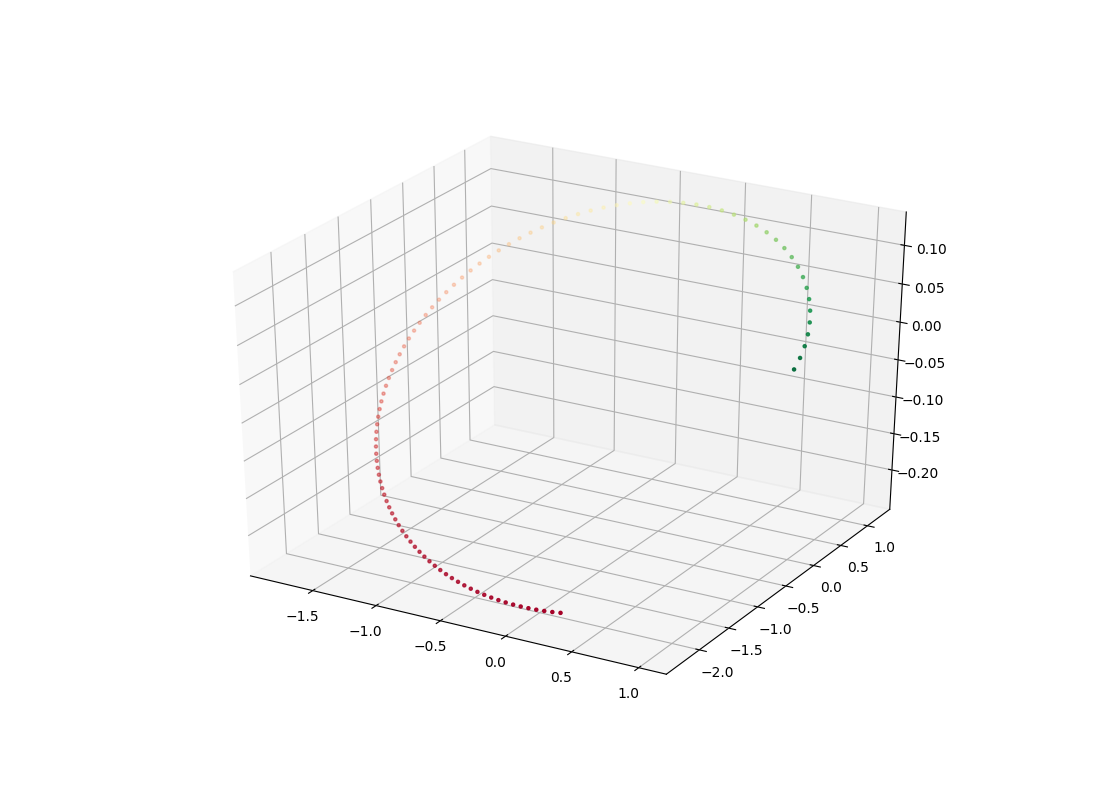

<IPython.core.display.Javascript object>


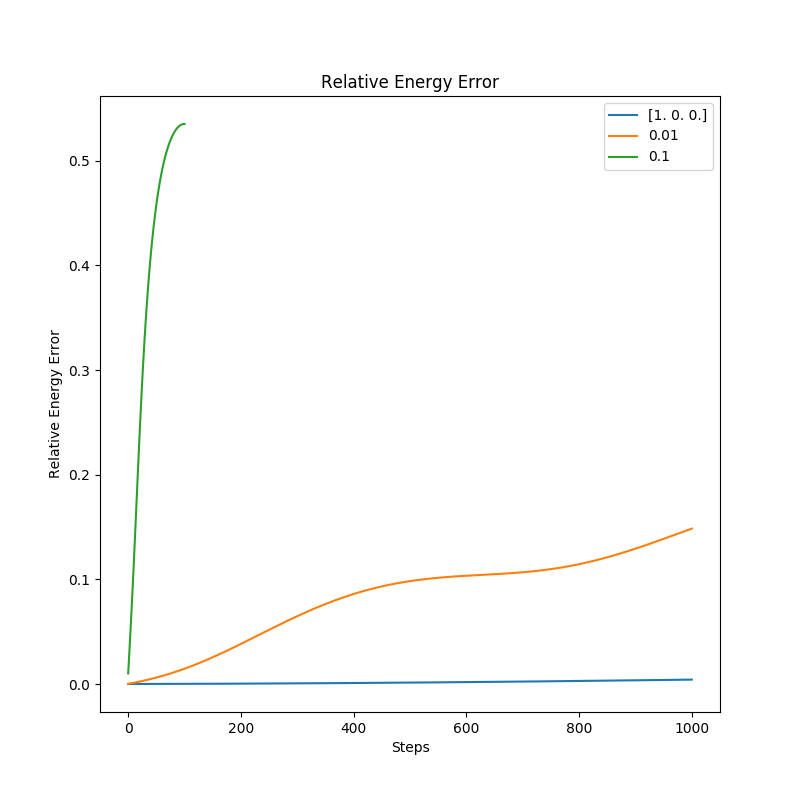

In [48]:
A = Euler([1, 0, 0], [0, 1, 0.1], 0.001, 10000, threed=True)
A.calc()
fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(A.x_location, A.y_location, A.z_location, c=A.energies, cmap='RdYlGn_r', marker=".")

B = Euler([1, 0, 0], [0, 1, 0.1], 0.01, 1000, threed=True)

B.calc()
fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(B.x_location, B.y_location, B.z_location, c=B.energies, cmap='RdYlGn_r', marker=".")

C = Euler([1, 0, 0], [0, 1, 0.1], 0.1, 100, threed=True)

C.calc()
fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(C.x_location, C.y_location, C.z_location, c=C.energies, cmap='RdYlGn_r', marker=".")


plt.figure(figsize=(8,8))
plt.title("Relative Energy Error")
plt.ylabel("Relative Energy Error")
plt.xlabel("Steps")
plt.plot(np.linspace(0, A.steps, len(A.rel_Error)), A.rel_Error, label=A.s_0)
plt.plot(np.linspace(0, B.steps, len(B.rel_Error)), B.rel_Error, label=f"{str(B.h)}")
plt.plot(np.linspace(0, C.steps, len(C.rel_Error)), C.rel_Error, label=f"{str(C.h)}")
plt.legend()